Is there a relationship between the daily minimum and maximum temperature? Can you predict the maximum temperature given the minimum temperature? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import folium
warnings.filterwarnings('ignore')

In /home/dongjun819/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/dongjun819/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/dongjun819/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/dongjun819/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/dongjun819/.local/lib/python3.6/site-packages/m

In [2]:
summary_weather_data = pd.read_csv('Summary of Weather.csv')

In [3]:
summary_weather_data.columns

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

In [4]:
weather_condition_data=pd.read_csv('Weather Station Locations.csv')

In [5]:
weather_condition_data.columns

Index(['WBAN', 'NAME', 'STATE/COUNTRY ID', 'LAT', 'LON', 'ELEV', 'Latitude',
       'Longitude'],
      dtype='object')

In [6]:
weather_condition_data.head()

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333


In [7]:
place_lat=weather_condition_data['Latitude']
place_lng=weather_condition_data['Longitude']

In [8]:
place_lat.dtype
place_lng.dtype

dtype('float64')

In [9]:
array_loc=[]
for x, y in zip(place_lat, place_lng):
    array =x, y
    array_loc.append(array)

In [10]:
from folium.plugins import MarkerCluster

In [11]:
geo_map = folium.Map(location=[36.383333,6.650000], zoom_start= 5)
marker_cluster=MarkerCluster().add_to(geo_map)
for i in array_loc:
    folium.Marker(location=[i[0],i[1]],fill_color='#43d9de', radius=8 ).add_to(marker_cluster)
geo_map

In [12]:
temperature_data=summary_weather_data[['MinTemp','MaxTemp']]
temperature_data

,MinTemp,MaxTemp
0,22.222222,25.555556
1,21.666667,28.888889
2,22.222222,26.111111
3,22.222222,26.666667
4,21.666667,26.666667
...,...,...
119035,18.333333,28.333333
119036,18.333333,29.444444
119037,18.333333,28.333333
119038,18.333333,28.333333


In [13]:
temperature_data.describe()

,MinTemp,MaxTemp
count,119040.000000,119040.000000
mean,17.789511,27.045111
std,8.334572,8.717817
min,-38.333333,-33.333333
25%,15.000000,25.555556
50%,21.111111,29.444444
75%,23.333333,31.666667
max,34.444444,50.000000


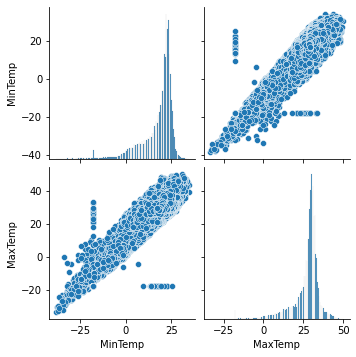

In [14]:
sns.pairplot(temperature_data)

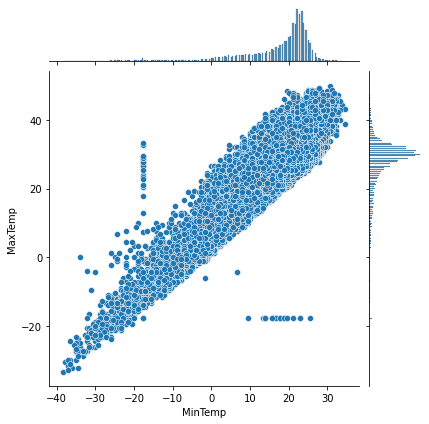

In [15]:
sns.jointplot(data=temperature_data,x='MinTemp', y='MaxTemp')

In [16]:
X = temperature_data[['MinTemp']]
Y = temperature_data[['MaxTemp']] 

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression(normalize=True)
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [20]:
model.intercept_

array([10.74063504])

In [21]:
pred = model.predict(X_test)
print(pred)

[[21.4363286 ]
 [32.64134089]
 [16.85245993]
 ...
 [31.62270341]
 [33.15065962]
 [29.58542845]]


In [22]:
model.score(X_test,Y_test)

0.7789818391676183

Text(0, 0.5, 'MaxTemp')

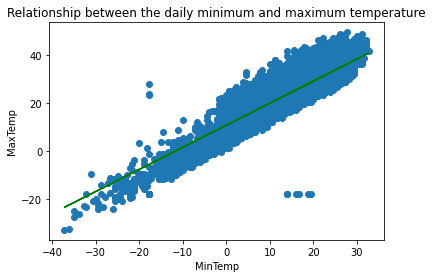

In [23]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, pred, color = 'g')
plt.title("Relationship between the daily minimum and maximum temperature")
plt.xlabel("MinTemp")
plt.ylabel("MaxTemp")

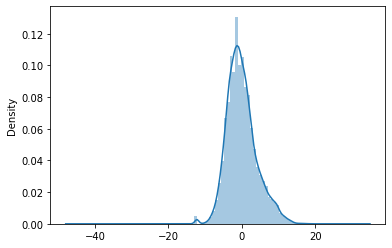

In [24]:
sns.distplot((Y_test-pred),bins=100);

In [25]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [26]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [27]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

In [28]:
print_evaluate(Y_train,train_pred)

MAE: 3.1918985317878645
MSE: 17.465599724852122
RMSE: 4.179186490796041
R2 Square 0.769676150729987
